In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
    
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm 

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

# for importing images
import glob
import cv2

In [4]:
folders= [
    'PNEUMONIA',
    "NORMAL"
]

In [5]:
path=[]
for folder in folders:
    path.append(glob.glob("Data/chest_xray/train/"+folder+"/*.jpeg"))

In [6]:
path

[['Data/chest_xray/train/PNEUMONIA\\person1000_bacteria_2931.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1000_virus_1681.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1001_bacteria_2932.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1002_bacteria_2933.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1003_bacteria_2934.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1003_virus_1685.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1004_bacteria_2935.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1004_virus_1686.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1005_bacteria_2936.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1005_virus_1688.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1006_bacteria_2937.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1007_bacteria_2938.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1007_virus_1690.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1008_bacteria_2939.jpeg',
  'Data/chest_xray/train/PNEUMONIA\\person1008_virus_1691.jpeg'

In [8]:
len(path)

2

In [128]:
path[1]

['Data/chest_xray/train/NORMAL\\IM-0115-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0117-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0119-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0122-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0125-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0127-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0128-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0129-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0131-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0133-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0135-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0137-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0140-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0141-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0143-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0145-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0147-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0149-0001.jpeg',
 'Data/chest_xray/train/NORMAL\\IM-0151-0001.jpeg',
 'Data/chest

In [11]:
for i in path:
    for j in i:
        print(j)

Data/chest_xray/train/PNEUMONIA\person1000_bacteria_2931.jpeg
Data/chest_xray/train/PNEUMONIA\person1000_virus_1681.jpeg
Data/chest_xray/train/PNEUMONIA\person1001_bacteria_2932.jpeg
Data/chest_xray/train/PNEUMONIA\person1002_bacteria_2933.jpeg
Data/chest_xray/train/PNEUMONIA\person1003_bacteria_2934.jpeg
Data/chest_xray/train/PNEUMONIA\person1003_virus_1685.jpeg
Data/chest_xray/train/PNEUMONIA\person1004_bacteria_2935.jpeg
Data/chest_xray/train/PNEUMONIA\person1004_virus_1686.jpeg
Data/chest_xray/train/PNEUMONIA\person1005_bacteria_2936.jpeg
Data/chest_xray/train/PNEUMONIA\person1005_virus_1688.jpeg
Data/chest_xray/train/PNEUMONIA\person1006_bacteria_2937.jpeg
Data/chest_xray/train/PNEUMONIA\person1007_bacteria_2938.jpeg
Data/chest_xray/train/PNEUMONIA\person1007_virus_1690.jpeg
Data/chest_xray/train/PNEUMONIA\person1008_bacteria_2939.jpeg
Data/chest_xray/train/PNEUMONIA\person1008_virus_1691.jpeg
Data/chest_xray/train/PNEUMONIA\person1009_virus_1694.jpeg
Data/chest_xray/train/PNEUMON

Data/chest_xray/train/PNEUMONIA\person739_virus_1361.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_355.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_356.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_357.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_358.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_359.jpeg
Data/chest_xray/train/PNEUMONIA\person73_bacteria_360.jpeg
Data/chest_xray/train/PNEUMONIA\person740_bacteria_2643.jpeg
Data/chest_xray/train/PNEUMONIA\person740_virus_1362.jpeg
Data/chest_xray/train/PNEUMONIA\person740_virus_1363.jpeg
Data/chest_xray/train/PNEUMONIA\person741_bacteria_2644.jpeg
Data/chest_xray/train/PNEUMONIA\person741_virus_1364.jpeg
Data/chest_xray/train/PNEUMONIA\person742_virus_1365.jpeg
Data/chest_xray/train/PNEUMONIA\person743_bacteria_2646.jpeg
Data/chest_xray/train/PNEUMONIA\person743_virus_1366.jpeg
Data/chest_xray/train/PNEUMONIA\person744_bacteria_2647.jpeg
Data/chest_xray/train/PNEUMONIA\person744_virus_1367.j

In [12]:
cv_img = []
for i in path:
    for j in i:
        n = cv2.imread(j)
        cv_img.append(n)

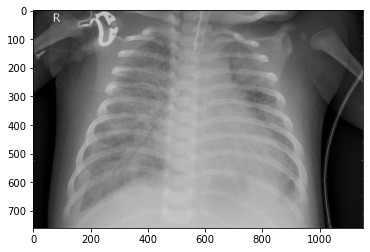

In [14]:
plt.imshow(cv_img[0])

In [16]:
cv_img

[array([[[19, 19, 19],
         [19, 19, 19],
         [18, 18, 18],
         ...,
         [ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[19, 19, 19],
         [19, 19, 19],
         [18, 18, 18],
         ...,
         [ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[19, 19, 19],
         [19, 19, 19],
         [18, 18, 18],
         ...,
         [ 1,  1,  1],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]],
 
        [[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]],
 
        [[10, 10, 10],
         [10, 10, 10],
         [10, 10, 10],
         ...,
         [15, 15, 15],
         [15, 15, 15],
         [15, 15, 15]]], dtype=uint8),
 array([[[66, 66, 66],
         [64, 64, 6

In [46]:
def load_images_from_folder(folder, images):
    images = images
    for filename in os.listdir(folder):
        if any([filename.endswith(x) for x in ['.jpeg', '.jpg']]):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

In [48]:
images_folder = []
for folder in folders:
    images = load_images_from_folder('Data/chest_xray/train/'+folder, images_folder)

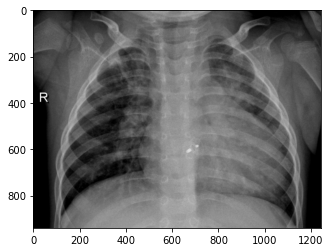

In [49]:
plt.imshow(images[3])
# type(images)

In [50]:
for folder in folders:
    print(folder)

PNEUMONIA
NORMAL


In [54]:
print(len(images))

5216


In [10]:


# images = [cv2.imread(file) for file in glob.glob("Data/chest_xray/train/NORMAL/*.jpeg")]
# images

[array([[[ 22,  22,  22],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 96,  96,  96],
         [ 94,  94,  94],
         [ 93,  93,  93]],
 
        [[ 23,  23,  23],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 97,  97,  97],
         [ 94,  94,  94],
         [ 92,  92,  92]],
 
        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 23,  23,  23],
         ...,
         [ 99,  99,  99],
         [ 96,  96,  96],
         [ 94,  94,  94]],
 
        ...,
 
        [[ 49,  49,  49],
         [ 50,  50,  50],
         [ 48,  48,  48],
         ...,
         [119, 119, 119],
         [119, 119, 119],
         [119, 119, 119]],
 
        [[ 50,  50,  50],
         [ 52,  52,  52],
         [ 53,  53,  53],
         ...,
         [123, 123, 123],
         [124, 124, 124],
         [123, 123, 123]],
 
        [[ 52,  52,  52],
         [ 53,  53,  53],
         [ 54,  54,  54],
         ...,
         [129, 129, 129],
  

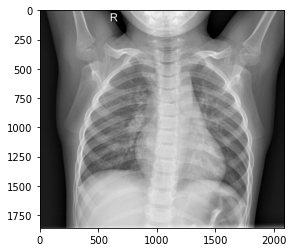

In [12]:
plt.imshow(images[0]);

In [13]:
images

[array([[[ 22,  22,  22],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 96,  96,  96],
         [ 94,  94,  94],
         [ 93,  93,  93]],
 
        [[ 23,  23,  23],
         [ 24,  24,  24],
         [ 24,  24,  24],
         ...,
         [ 97,  97,  97],
         [ 94,  94,  94],
         [ 92,  92,  92]],
 
        [[ 24,  24,  24],
         [ 24,  24,  24],
         [ 23,  23,  23],
         ...,
         [ 99,  99,  99],
         [ 96,  96,  96],
         [ 94,  94,  94]],
 
        ...,
 
        [[ 49,  49,  49],
         [ 50,  50,  50],
         [ 48,  48,  48],
         ...,
         [119, 119, 119],
         [119, 119, 119],
         [119, 119, 119]],
 
        [[ 50,  50,  50],
         [ 52,  52,  52],
         [ 53,  53,  53],
         ...,
         [123, 123, 123],
         [124, 124, 124],
         [123, 123, 123]],
 
        [[ 52,  52,  52],
         [ 53,  53,  53],
         [ 54,  54,  54],
         ...,
         [129, 129, 129],
  

In [71]:
from sklearn.preprocessing import Normalizer

normalize= Normalizer()

In [68]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.5.
The scikit-learn version is 0.23.2.
